In [56]:
titanic = pd.read_csv('train_and_test2.csv')
titanic.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [3]:
titanic['Pclass'].head() #1st~3rd class

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [4]:
titanic['Embarked'].tail() # 0, 1, 2 // C = Cherbourg, Q = Queenstown, S = Southampton

1304    2.0
1305    0.0
1306    2.0
1307    2.0
1308    0.0
Name: Embarked, dtype: float64

In [5]:
titanic['sibsp'].tail() # of siblings / spouses aboard the Titanic

1304    0
1305    0
1306    0
1307    0
1308    1
Name: sibsp, dtype: int64

In [6]:
titanic['Parch'].tail() # of parents / children aboard the Titanic

1304    0
1305    0
1306    0
1307    0
1308    1
Name: Parch, dtype: int64

So the feautres to consider refer to 'age', 'fare', 'sex', 'embarked', 'Pclass', ''sibsp', and 'Parch'  # 7 features
What I'm gonna do is to use these 7 features to maximaize the predictability of the model and practice.

First, I'll use matplotlib to visulize the relationship between the features and 'survived'


*Filled the missing values in 'Age' and 'Fare' attributes with the median of the data.

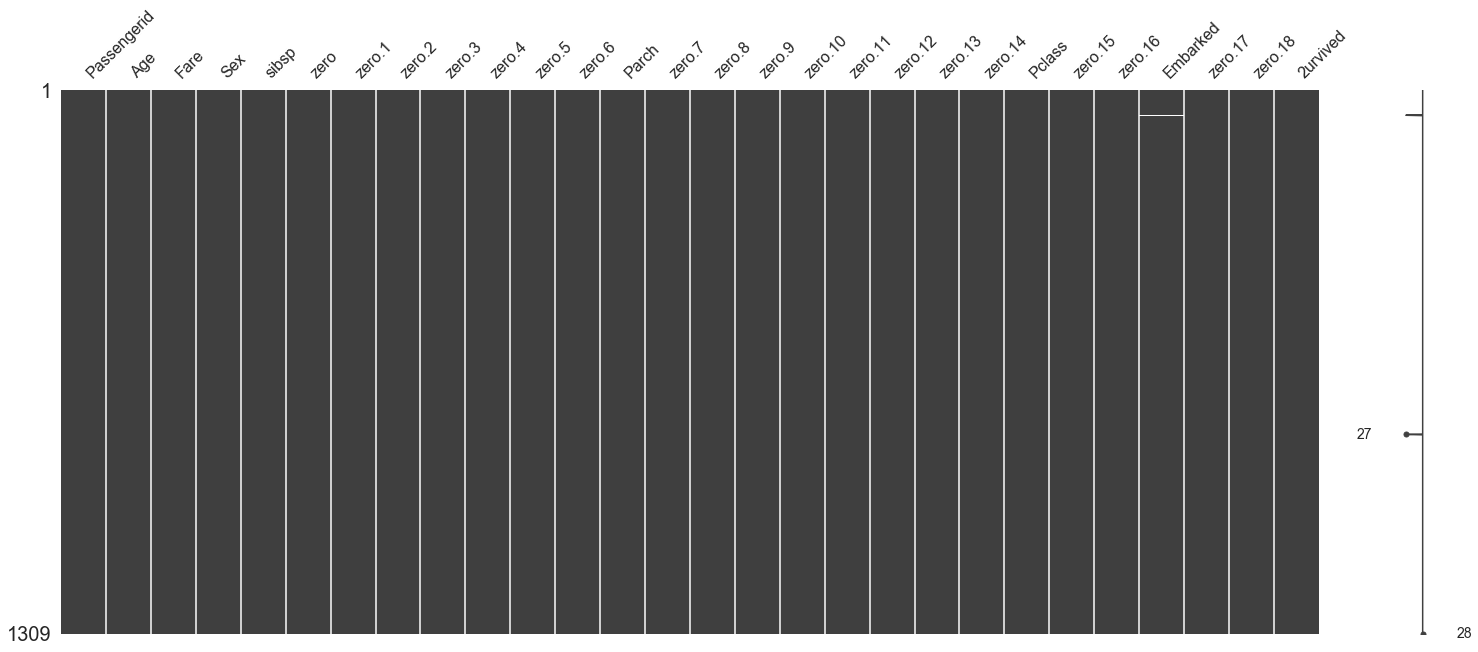

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64


In [58]:
msno.matrix(titanic)
plt.show()

print(titanic.isnull().sum())

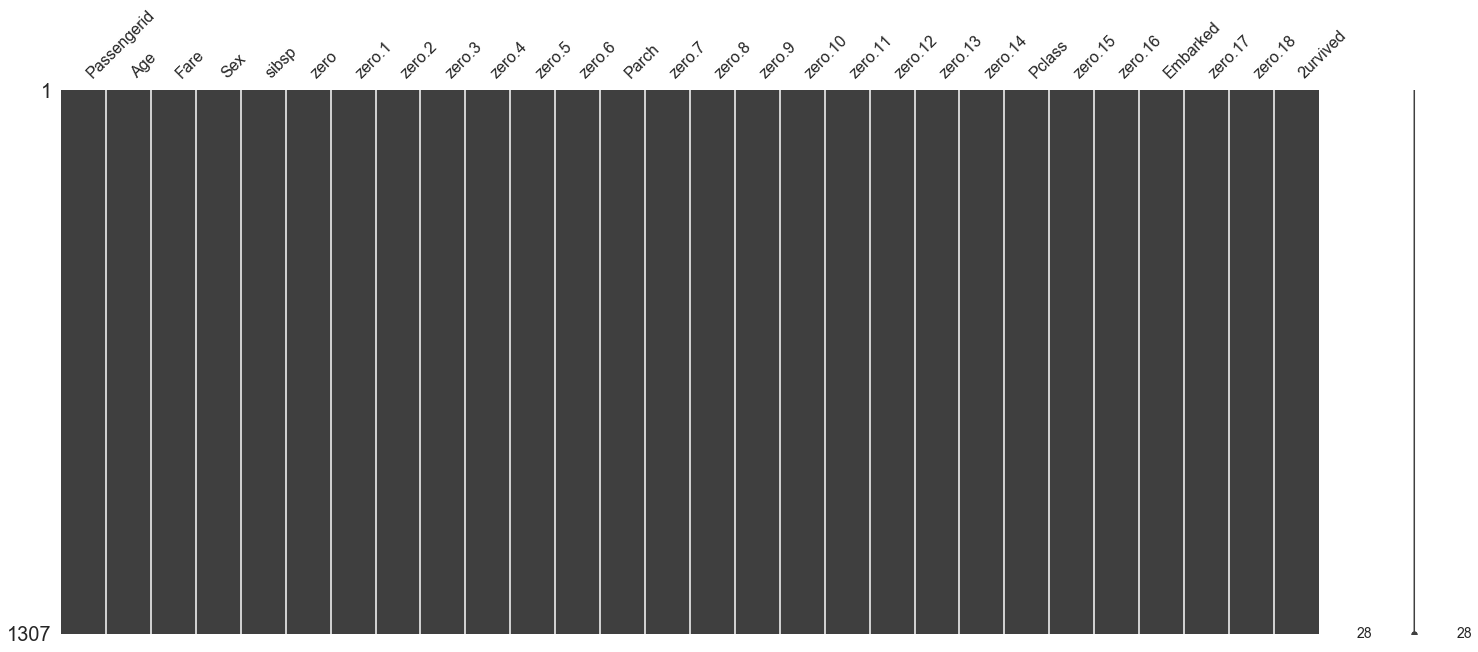

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       0
zero.17        0
zero.18        0
2urvived       0
dtype: int64


In [65]:
titanic = titanic.dropna() #결측치 있는 Embarked 행 2개 삭제(데이터 2개 삭제)

msno.matrix(titanic)
plt.show()
print(titanic.isnull().sum()) 

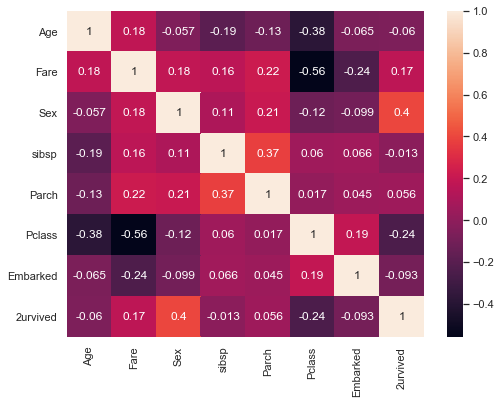

In [67]:
corr_list = ['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked', '2urvived']
corr = titanic[corr_list].corr()  #Pearson Correlation Coefficient



mpl.pyplot.figure(figsize=(8,6))
sns.heatmap(corr, annot = True, cbar=True)

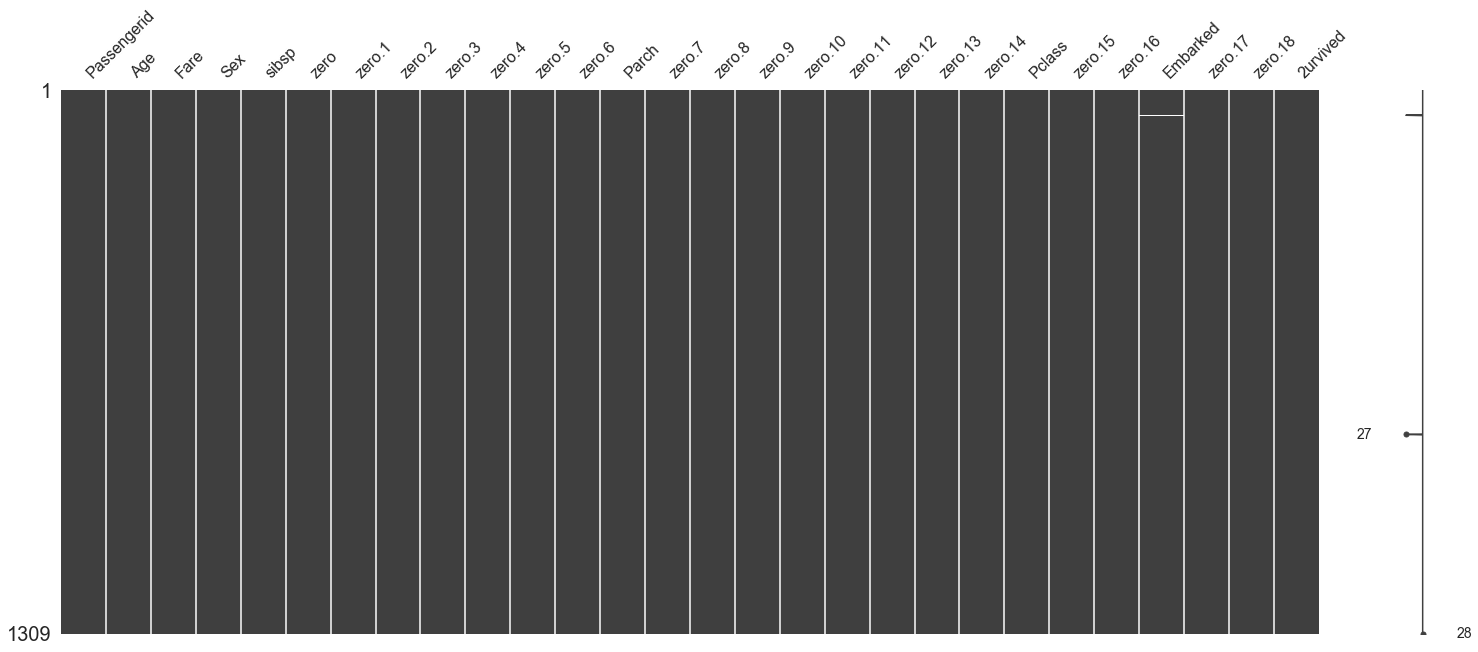

In [52]:
import missingno as msno

msno.matrix(titanic)
plt.show()

Seems that most of the feautres except for 'sex' dont have strong relations with 'survived'.


Then let me check if there's use the linear regression model to check if each of thoes features have any linear relation with 'survived'. 

In [81]:
from sklearn.linear_model import LinearRegression

for i in range(7):
    idx = ['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked']
    feature = idx[i]
    X0 = titanic[feature]
    X = sm.add_constant(X0)
    y = titanic['2urvived']

    model = sm.OLS(y, X)
    result = model.fit()
    print(f"{feature}의 회귀분석 결과", sep='\n')
    print(result.summary())
    sp.stats.probplot(result.resid, plot=plt)
    plt.title("f{feature}의 잔차 분포")
    plt.show()


Age의 회귀분석 결과
                            OLS Regression Results                            
Dep. Variable:               2urvived   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.752
Date:                Wed, 16 Sep 2020   Prob (F-statistic):             0.0294
Time:                        13:40:09   Log-Likelihood:                -775.32
No. Observations:                1307   AIC:                             1555.
Df Residuals:                    1305   BIC:                             1565.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3206      0.030     10

In [ ]:
sns.pairplot(titanic, hue='2urvived')
plt.title("Titanic")
plt.show()

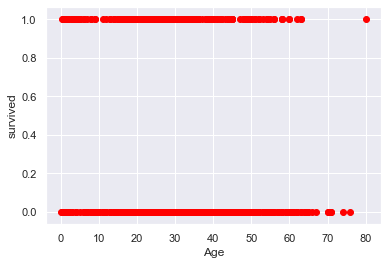

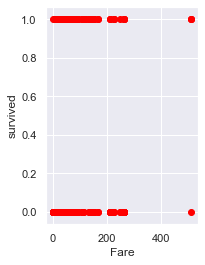

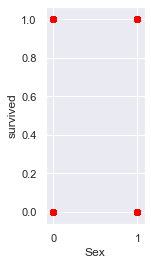

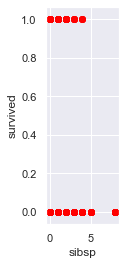

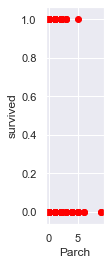

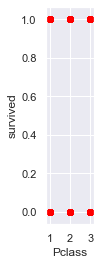

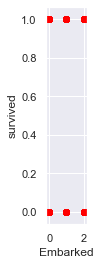

In [101]:
for i in range(7):
    idx = ['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked']
    feature = idx[i]
    X0 = titanic[feature]
    X = sm.add_constant(X0)
    y = titanic['2urvived']


    plt.subplot(1, i+1, i+1)
    plt.scatter(X0, y, color='red')

    plt.xlabel(f"{feature}")
    plt.ylabel("survived")
    plt.show()
    


It doesnt look however like a linear correlation.

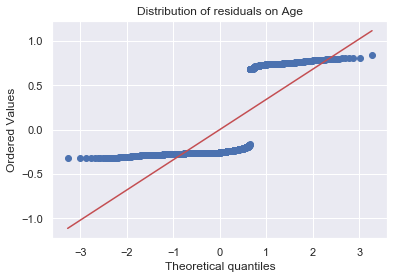

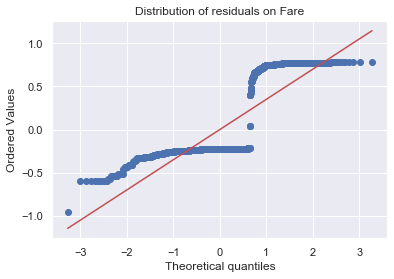

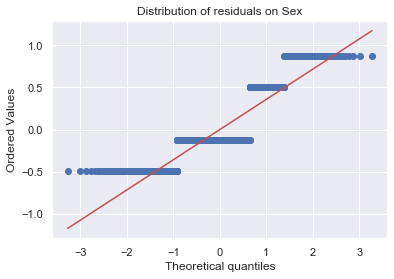

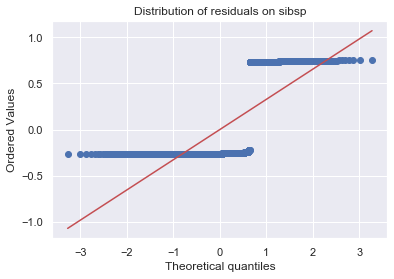

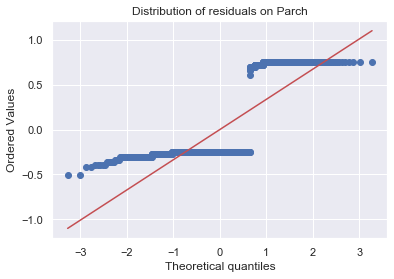

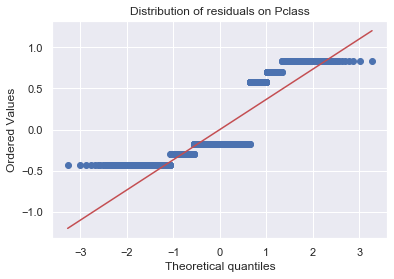

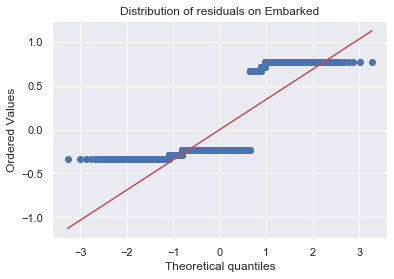

In [103]:
from sklearn.linear_model import LinearRegression

for i in range(7):
    idx = ['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked']
    feature = idx[i]
    X0 = titanic[feature]
    X = sm.add_constant(X0)
    y = titanic['2urvived']

    model = sm.OLS(y, X)
    result = model.fit()
    sp.stats.probplot(result.resid, plot=plt)
    plt.title(f"Distribution of residuals on {feature}")
    plt.show()


Even the distribution of every residual is not equal to the linear regression.

If it were not for a linear regression, what would it be like for logistic regression?
It might work beter with the model.